# Tables, Figures & Results for Enlil

--- Originally created on 29th February 2024.


## Output Files

Experiments and their corresponding output files are listed in the table(s) below.
These are generally 100 replications with a 18 week warm-up period.
We account for the Duffy GATA mutation by making all Fy(a-b-) individuals Fy(a-b+) instead.

First for the rule comparison sub-section:

| Experiment | Output File | Job ID |
|------------|-------------|--------|
| Limited rule (L0) | `out/experiments/exp3/20240228/2208/Limited22-56_output.tsv` | 47086521 |
| Extended rule (E0) | `out/experiments/exp3/20240228/2208/Extended22-37_output.tsv` | 47086521 |
| Extended rule with forecasting (E1) | `out/experiments/exp3/20240228/2217/Extended23-19_output.tsv` | 47086796 |


Then the parameter/penalty comparison sub-section:

| Experiment | Output File | Job ID |
|------------|-------------|--------|
| Baseline (E0) | `out/experiments/exp3/20240228/2208/Extended22-37_output.tsv` | 47086521 |
| No substitution (No SUB) | `out/experiments/exp3/20240228/2212/Extended22-40_output.tsv` | 47086522 |
| No minor substitution (No MIN) | `out/experiments/exp3/20240228/2209/Extended22-39_output.tsv` | 47086523 |
| No major substitution (No MAJ) | `out/experiments/exp3/20240228/2211/Extended22-38_output.tsv` | 47086524 |
| Zero Young Blood (Zero YB) | `out/experiments/exp3/20240228/2210/Extended22-39_output.tsv` | 47086525 |
| No Young Blood (No YB) | `out/experiments/exp3/20240228/2213/Extended22-49_output.tsv` | 47086526 |
| No FIFO (No FIFO) | `out/experiments/exp3/20240228/2214/Extended22-27_output.tsv` | 47086527 |
| No immunogenicity (No IMM) | `out/experiments/exp3/20240228/2215/Extended22-40_output.tsv` | 47086528 |


Then the results of parameter tuning with Bayesian optimisation:

| Experiment | Output Folder | Tuning Results File | Job ID |
|------------|---------------| ------------------- |--------|
| 30k inventory | `out/experiments/exp3/tuning/20240228/2253/` | `out/experiments/exp3/tuning/20240228/2253/29_02-48tuning_results.tsv` | 47086959 |
| 15k inventory | `out/experiments/exp3/tuning/20240229/0318/` | `out/experiments/exp3/tuning/20240229/0318/29_05-47tuning_results.tsv` | 47089152 |
| 10k inventory | `out/experiments/exp3/tuning/20240229/0308/` | `out/experiments/exp3/tuning/20240229/0308/29_05-01tuning_results.tsv` | 47089184 |


Finally the results of parameter tuning with BO when there is no YB constraint (nor penalty):
| Experiment | Output Folder | Tuning Results File | Job ID |
|------------|---------------| ------------------- |--------|
| 30k inventory No YB | `out/experiments/exp3/tuning/20240304/2225/` | `out/experiments/exp3/tuning/20240304/2225/05_04-13tuning_results.tsv` | 47492788 |



## Setup

Autoreload, imports, and seaborn theme.

Assign the output files to variables and dictionaries for easy access.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%aimport scratch.convenience_functions

In [4]:
cf = scratch.convenience_functions

In [5]:
sns.set_theme(style='white', context='notebook', font_scale=1.5, font='Nimbus Roman')

In [6]:
limited = 'out/experiments/exp3/20240228/2208/Limited22-56_output.tsv'
extended = 'out/experiments/exp3/20240228/2208/Extended22-37_output.tsv'
forecasting = 'out/experiments/exp3/20240228/2217/Extended23-19_output.tsv'

extended_no_substitution = 'out/experiments/exp3/20240228/2212/Extended22-40_output.tsv'
no_minor_substitution = 'out/experiments/exp3/20240228/2209/Extended22-39_output.tsv'
no_major_substitution = 'out/experiments/exp3/20240228/2211/Extended22-38_output.tsv'
zero_young_blood = 'out/experiments/exp3/20240228/2210/Extended22-39_output.tsv'
no_young_blood = 'out/experiments/exp3/20240228/2213/Extended22-49_output.tsv'
no_fifo = 'out/experiments/exp3/20240228/2214/Extended22-27_output.tsv'
no_immunogenicity = 'out/experiments/exp3/20240228/2215/Extended22-40_output.tsv'

bo_30k_res = 'out/experiments/exp3/tuning/20240228/2253/29_02-48tuning_results.tsv'
bo_15k_res = 'out/experiments/exp3/tuning/20240229/0318/29_05-47tuning_results.tsv'
bo_10k_res = 'out/experiments/exp3/tuning/20240229/0308/29_05-01tuning_results.tsv'

bo_30k_no_yb_res = 'out/experiments/exp3/tuning/20240304/2225/05_04-13tuning_results.tsv'

In [7]:
sensitivity_files_dict = {'Naive weights': extended,
                            'No substitution': extended_no_substitution,
                            'No minor substitution': no_minor_substitution,
                            'No major substitution': no_major_substitution,
                            'Zero young blood': zero_young_blood,
                            'No young blood': no_young_blood,
                            'No FIFO': no_fifo,
                            'No immunogenicity': no_immunogenicity}

In [8]:
rules_files_dict = {'L0': limited,
                    'E0': extended,
                    'E1': forecasting
}

In [9]:
major_types_to_plot = ['O-', 'O+', 'B-', 'B+', 'A-', 'A+', 'AB-', 'AB+']
duffy_types_to_plot = ['Fya-', 'Fyb-',]
days_range_start = 7*6*3 + 1
days_range_end = 7*6*4 + 1

## Comparing the Limited and Extended Rules

We evaluated the Limited and Extended matching rules with our simulation framework over a period of six weeks.
We simulated 100 replications with each replication including a warm-up period of 18 weeks to reach steady-state.

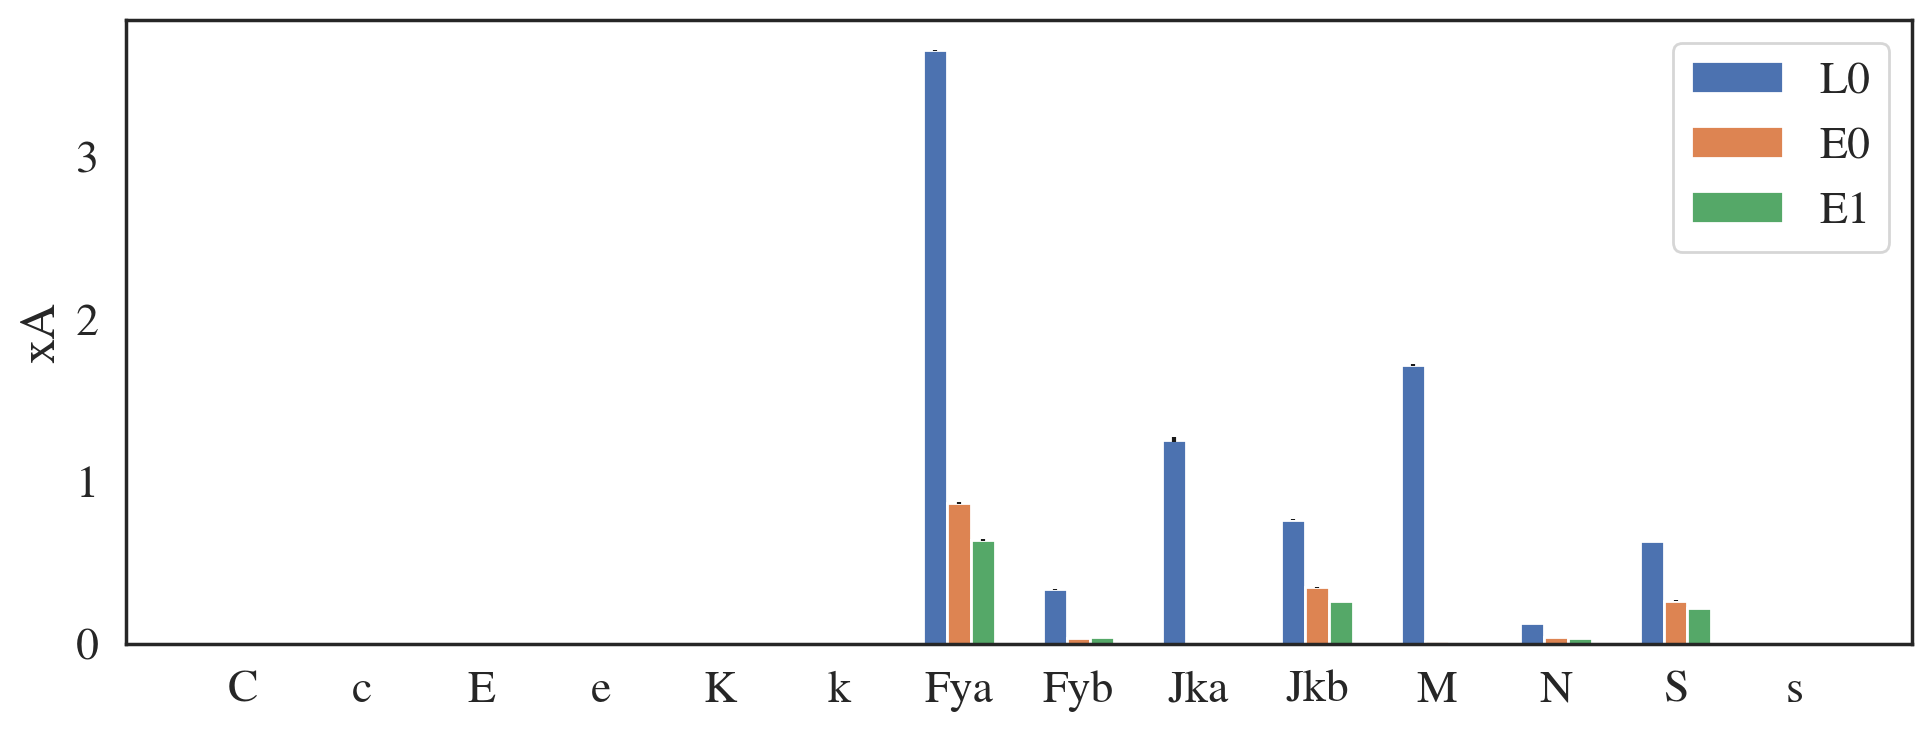

In [10]:
cf.exp2_figs(limited, extended, forecasting, figsize=(10,4),
             labels=['L0', 'E0', 'E1'],
             colours=['C0', 'C1', 'C2'],
             pdfs=[None, None, 'scratch/figures/Enlil/six_week_allos.pdf'],
             skip_plots=[True, True, False],
             ylabels=['', '', 'xA'])

In [11]:
cf.objectives_stats_table(rules_files_dict)

,L0,E0,E1
alloimmunisations,8.496 ± 0.0162,1.580 ± 0.0065,1.207 ± 0.0050
scd_shortages,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000
expiries,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000
all_shortages,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000
O_neg_level,0.359 ± 0.0003,0.368 ± 0.0003,0.375 ± 0.0003
O_pos_level,0.584 ± 0.0003,0.575 ± 0.0003,0.564 ± 0.0003
O_level,0.942 ± 0.0000,0.943 ± 0.0000,0.939 ± 0.0000
D_subs_num_patients,698.680 ± 2.2840,791.380 ± 2.1041,787.150 ± 2.1901
ABO_subs_num_patients,694.950 ± 1.9184,703.220 ± 1.8257,695.010 ± 1.8441
ABOD_subs_num_patients,350.370 ± 1.7020,401.600 ± 1.6659,388.700 ± 1.6670


In [12]:
cf.read_and_average_comp_times(rules_files_dict)

,L0,E0,E1
computation_time,111 ± 10.3,176 ± 18.3,736 ± 4.3


## Components of the penalty function

We evaluated the effect of each component of the penalty function on the performance of the Extended rule.
This was done by removing each penalty in turn from $\pi$, i.e., setting the corresponding $\lambda_f=0$. And in one of the scenarios, we remove a constraint and modify another.

In [13]:
cf.objectives_stats_table(sensitivity_files_dict)

,Naive weights,No substitution,No minor substitution,No major substitution,Zero young blood,No young blood,No FIFO,No immunogenicity
alloimmunisations,1.580 ± 0.0065,0.290 ± 0.0025,0.961 ± 0.0048,0.500 ± 0.0042,1.032 ± 0.0050,0.236 ± 0.0022,3.251 ± 0.0071,5.670 ± 0.0110
scd_shortages,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000,0.050 ± 0.0359,0.000 ± 0.0000
expiries,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000,70.500 ± 2.3552,0.000 ± 0.0000
all_shortages,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000,0.050 ± 0.0359,0.000 ± 0.0000
O_neg_level,0.368 ± 0.0003,0.140 ± 0.0001,0.370 ± 0.0003,0.196 ± 0.0002,0.414 ± 0.0003,0.429 ± 0.0002,0.396 ± 0.0004,0.371 ± 0.0003
O_pos_level,0.575 ± 0.0003,0.357 ± 0.0002,0.573 ± 0.0003,0.307 ± 0.0002,0.529 ± 0.0003,0.514 ± 0.0002,0.270 ± 0.0004,0.572 ± 0.0003
O_level,0.943 ± 0.0000,0.498 ± 0.0002,0.943 ± 0.0000,0.503 ± 0.0002,0.943 ± 0.0000,0.943 ± 0.0000,0.666 ± 0.0001,0.943 ± 0.0000
D_subs_num_patients,791.380 ± 2.1041,1017.060 ± 1.5718,597.920 ± 2.2629,982.020 ± 1.6555,687.400 ± 2.0829,930.610 ± 1.5498,1244.330 ± 0.8830,781.020 ± 2.5489
ABO_subs_num_patients,703.220 ± 1.8257,600.700 ± 2.1437,700.690 ± 1.8384,552.230 ± 2.3201,212.390 ± 1.5703,546.630 ± 2.1630,698.770 ± 1.8830,701.430 ± 1.8544
ABOD_subs_num_patients,401.600 ± 1.6659,384.520 ± 1.8019,296.710 ± 1.6494,356.140 ± 1.8205,56.080 ± 0.8272,300.530 ± 1.6105,625.520 ± 1.7351,392.690 ± 1.7337


In [14]:
table_df = cf.objectives_stats_table(sensitivity_files_dict)
# print(table_df.to_csv(sep='\t'))

In [ ]:
cf.avg_stock_composition(['Donations', 'E0', 'E0 (No MAJ)', 'E0 (No MIN)', 'E0 (No SUB)'],
                         [extended, no_major_substitution, no_minor_substitution, extended_no_substitution],
                         ncol=8, figsize=(13,5),
                         pdf='scratch/figures/Enlil/substitution-penalty-stock-composition.pdf')

cf.avg_stock_composition(['Donations', 'E0', 'E0 (No SUB)', 'E0 (No MIN)', 'E0 (No MAJ)', 'E1'],
                         [extended, extended_no_substitution, no_minor_substitution, no_major_substitution, forecasting],
                         ncol=8, figsize=(13,5),
                         pdf='scratch/figures/Enlil/substitution-penalty-stock-composition-b.pdf')

## Substitution Penalties

### Minor Substitution Penalty Removed

The minor substitution penalty is removed, but the major substitution penalty is still in place.


Extract the average stock levels over the post-warm-up period with the standard errors.

In [16]:
stock_level_df = pd.read_csv(extended.replace('_output.tsv', '_stocks.tsv'), sep='\t')
stock_level_avg_df = stock_level_df[duffy_types_to_plot]
stock_level_se_df = stock_level_df[['_se_' + x for x in duffy_types_to_plot]]
stocks = []
sensitivity_files_keys = list(sensitivity_files_dict.keys()) + ['Limited']
for f, scenario in dict(sensitivity_files_dict, Limited=limited).items():
    scenario
    stock_level_df = pd.read_csv(scenario.replace('_output.tsv', '_stocks.tsv'), sep='\t')
    stock_level_avg_df = stock_level_df[duffy_types_to_plot]
    stock_level_se_df = stock_level_df[['_se_' + x for x in duffy_types_to_plot]]
    stocks.append(stock_level_avg_df.iloc[-42:].mean().values)
    stocks.append((((stock_level_se_df.iloc[-42:] ** 2).sum() ** .5)/42).values)
stocks = np.array(stocks)
pd.DataFrame(stocks.reshape(len(sensitivity_files_keys), 4)* 100,
             columns=duffy_types_to_plot+['se_' + x for x in duffy_types_to_plot], 
             index=sensitivity_files_keys)    
    

,Fya-,Fyb-,se_Fya-,se_Fyb-
Naive weights,26.672371,18.621183,0.006281,0.004398
No substitution,33.632575,17.056905,0.004396,0.003393
No minor substitution,27.975360,18.029317,0.005951,0.004063
No major substitution,35.045618,18.469500,0.005755,0.004136
Zero young blood,32.141977,17.780364,0.005749,0.003741
No young blood,35.581854,17.292401,0.004407,0.003418
No FIFO,37.810626,17.910741,0.011133,0.009565
No immunogenicity,34.199042,18.844339,0.004477,0.003782
Limited,34.312314,16.970289,0.004417,0.003386


It's a bit tricky to analyse this result - there are a bunch of interactions that are hard to interpret from first principles.

No point in analysing the number of substitutions on minor antigens.
Bbecause what is more important is the reduction in alloimmunisation, which goes down, so clearly there are antigen-negative units available.

### Major Substitution Penalty Removed

Compare with when only minor substitution penalty is removed.
Is the drop in expected alloimmunisation ‘exactly’ the same as when both substitution penalties are removed (because minor substitution penalty might be preventing a small amount of mismatching)?

For this, we compare the results of the following three scenarios:
- Naïve weights
- Minor substitution penalty removed
- Major substitution penalty removed

### Both Major & Minor Substitution Penalties Removed

For this, we compare the results of the following three scenarios:
- Naïve weights
- Minor substitution penalty removed
- Major substitution penalty removed

Plot the distribution of RBC units allocated to SCD patients and distribution of RBC units in the inventory.


In [ ]:
_dft = cf.plot_age_dist_blood(extended_no_substitution,
                              age_range=np.arange(1, 36), re_index=True, vmax=330, 
                                days_range=np.arange(days_range_start, days_range_end),
                                title=None, plot_avg=True,
                                figsize=(8, 4),
                                pdf='scratch/figures/Enlil/age_dist_scd_mean_no_sub.pdf')
                                # print_max=True)

In [ ]:
print("All ages mean:")
_dft = cf.plot_age_dist_blood(extended_no_substitution, 'total_age_dist',
                       age_range=np.arange(1, 36), vmax=None, days_range=np.arange(days_range_start, days_range_end),
                       re_index=True,
                       print_max=True,
                       title=None,
                       cmap='binary', plot_avg=True, print_mean=True,
                       figsize=(7, 3.5),
                       pdf='scratch/figures/Enlil/age_dist_rbcs_no_sub.pdf')
print("Ages 2-35 mean:")
_dft = cf.plot_age_dist_blood(extended_no_substitution, 'total_age_dist',
                       age_range=np.arange(2, 36), vmax=None, days_range=np.arange(days_range_start, days_range_end),
                       re_index=True,
                       print_max=True,
                       title=None,
                       cmap='binary', plot_avg=True, print_mean=True,
                       figsize=(7, 3.5),
                       pdf='scratch/figures/Enlil/age_dist_rbcs_no_sub-b.pdf')


When both substitution penalties are removed - E0 No SUB: $4.81$ mean age $5.31$ if units that are one day old are excluded. 

Plot the age distribution of inventory for the no major substitution penalty scenario.


In [ ]:
print("All ages mean:")
_dft = cf.plot_age_dist_blood(no_major_substitution, 'total_age_dist',
                       age_range=np.arange(1, 36), vmax=None, days_range=np.arange(days_range_start, days_range_end),
                       re_index=True,
                       print_max=True,
                       title=None,
                       cmap='binary', plot_avg=True, print_mean=True,
                       figsize=(7, 3.5),
                       pdf='scratch/figures/Enlil/age_dist_rbcs_no_maj.pdf')
print("Ages 2-35 mean:")                    
_dft = cf.plot_age_dist_blood(no_major_substitution, 'total_age_dist',
                       age_range=np.arange(2, 36), vmax=None, days_range=np.arange(days_range_start, days_range_end),
                       re_index=True,
                       print_max=True,
                       title=None,
                       cmap='binary', plot_avg=True, print_mean=True,
                       figsize=(7, 3.5),)
                     #   pdf='scratch/figures/Enlil/age_dist_rbcs_no_maj-b.pdf')

When major substitution is removed - E0 No MAJ: $8.14$ mean age and $9.08$ if excluding units that are one day old.

Now plot the age distribution of inventory for the no minor substitution penalty scenario.

In [ ]:
print("All ages mean:")
_dft = cf.plot_age_dist_blood(no_minor_substitution, 'total_age_dist',
                          age_range=np.arange(1, 36), vmax=None, days_range=np.arange(days_range_start, days_range_end),
                          re_index=True,
                          print_max=True,
                          title=None,
                          cmap='binary', plot_avg=True, print_mean=True,
                          figsize=(7, 3.5),
                         pdf='scratch/figures/Enlil/age_dist_rbcs_no_min.pdf')
print("Ages 2-35 mean:")                      
_dft = cf.plot_age_dist_blood(no_minor_substitution, 'total_age_dist',
                          age_range=np.arange(2, 36), vmax=None, days_range=np.arange(days_range_start, days_range_end),
                          re_index=True,
                          print_max=True,
                          title=None,
                          cmap='binary', plot_avg=True, print_mean=True,
                          figsize=(7, 3.5),)
                      #    pdf='scratch/figures/Enlil/age_dist_rbcs_no_min.pdf')

When minor substitution is removed - E0 No MIN: $8.99$ mean age and $10.05$ if excluding units that are one day old.

## Young Blood Sensitivity Analysis

Analysis will require the following scenarios:
- Naïve weights
- No young blood penalty
- No young blood penalty & no young blood constraint



### Zero Young Blood Penalty
In this scenario, the young blood penalty is removed, but the young blood constraint is still in place. So units between 0 and 14 days are equally penalised all other attributes being equal.

Plot the distribution of age units in the inventory and units transfused to SCD patients.


In [ ]:
print("All ages mean:")
_dft = cf.plot_age_dist_blood(extended, 'total_age_dist',
                       age_range=np.arange(1, 36), vmax=None, days_range=np.arange(days_range_start, days_range_end),
                       re_index=True,
                       title=None, cmap='binary',
                       plot_avg=True, print_max=False, figsize=(15, 6),
                       print_mean=True,)
print("Ages 2-35 mean:")
_dft = cf.plot_age_dist_blood(extended, 'total_age_dist',
                       age_range=np.arange(2, 36), vmax=1400, days_range=np.arange(days_range_start, days_range_end),
                       re_index=True,
                       title=None, cmap='binary',
                       plot_avg=True, print_max=False, figsize=(15, 6),
                       print_mean=True,)

Baseline scenario E0: $11.79$ mean age and $13.22$ if excluding units that are one day old.

In [ ]:
print("All ages mean:")
_dft = cf.plot_age_dist_blood(zero_young_blood, 'total_age_dist',
                                age_range=np.arange(1, 36), vmax=None, days_range=np.arange(days_range_start, days_range_end),
                                re_index=True,
                                title=None, cmap='binary',
                                plot_avg=True, print_max=False, figsize=(15, 6),
                                print_mean=True,)
print("Ages 2-35 mean:")
_dft = cf.plot_age_dist_blood(zero_young_blood, 'total_age_dist',
                                age_range=np.arange(2, 36), vmax=1400, days_range=np.arange(days_range_start, days_range_end),
                                re_index=True,
                                title=None, cmap='binary',
                                plot_avg=True, print_max=False, figsize=(15, 6),
                                print_mean=True,)

Zero YB scenario: $11.52$ mean age and $12.91$ if excluding units that are one day old.

We can see the difference the young blood penalty makes in the above plots. The distribution of age of units in the inventory is more uniform when the young blood penalty is removed.

Specifically, there are fewer large step-changes in the age distribution of units in the inventory when the young blood penalty is removed. 

And in the following plot, we can see that the number of units transfused to SCD patients is more uniform when the young blood penalty is removed.

In [ ]:
sba_df = cf.plot_age_dist_blood(extended,
                       age_range=np.arange(1, 36), days_range=np.arange(days_range_start, days_range_end),
                       vmax=250, figsize=(8, 4),
                       re_index=True, title=None,
                       cmap='viridis', print_max=True, plot_avg=True,
                       pdf='scratch/figures/Enlil/age_dist_scd_mean.pdf')

d_f = cf.plot_age_dist_blood(zero_young_blood,
                       age_range=np.arange(1, 36), days_range=np.arange(days_range_start, days_range_end),
                       vmax=250, figsize=(8, 4),
                       re_index=True, title=None,
                       cmap='viridis', print_max=True, plot_avg=True,
                       pdf='scratch/figures/Enlil/age_dist_scd_mean_zero_yb.pdf')

### No Young Blood Penalty & No Young Blood Constraint

Same as before, plot the distribution of age units in the inventory and units transfused to SCD patients.

In [ ]:
_dft = cf.plot_age_dist_blood(extended, 'total_age_dist',
                       age_range=np.arange(1, 36), vmax=None, days_range=np.arange(days_range_start, days_range_end),
                       re_index=True,
                       title=None,
                       cmap='binary', plot_avg=True,
                       figsize=(7, 3.5),
                       pdf='scratch/figures/Enlil/age_dist_rbcs.pdf')

_dft = cf.plot_age_dist_blood(extended, 'total_age_dist',
                       age_range=np.arange(2, 36), vmax=1400, days_range=np.arange(days_range_start, days_range_end),
                       re_index=True,
                       title=None,
                       cmap='binary', plot_avg=True,
                       figsize=(7, 3.5),
                       pdf='scratch/figures/Enlil/age_dist_rbcs-b.pdf')

_dft = cf.plot_age_dist_blood(zero_young_blood, 'total_age_dist',
                          age_range=np.arange(1, 36), vmax=None, days_range=np.arange(days_range_start, days_range_end),
                          re_index=True,
                          title=None,
                          cmap='binary', plot_avg=True,
                          figsize=(7, 3.5),
                          pdf='scratch/figures/Enlil/age_dist_rbcs_zero_yb.pdf')

print("All ages mean:")
_dft = cf.plot_age_dist_blood(no_young_blood, 'total_age_dist',
                          age_range=np.arange(1, 36), vmax=None, days_range=np.arange(days_range_start, days_range_end),
                          re_index=True,
                          title=None,
                          cmap='binary', plot_avg=True,
                          figsize=(7, 3.5),
                          print_mean=True,
                          pdf='scratch/figures/Enlil/age_dist_rbcs_no_yb.pdf')
print("Ages 2-35 mean:")
_dft = cf.plot_age_dist_blood(no_young_blood, 'total_age_dist',
                          age_range=np.arange(2, 36), vmax=1400, days_range=np.arange(days_range_start, days_range_end),
                          re_index=True,
                          title=None,
                          cmap='binary', plot_avg=True,
                          figsize=(7, 3.5),
                          print_mean=True,
                          pdf='scratch/figures/Enlil/age_dist_rbcs_no_yb-b.pdf')

No YB Scenario: $11.14$ mean age and $12.48$ if excluding units that are one day old.

Max age of blood given to SCD patients:
- Naïve weights: 9 days
- No young blood penalty: 14 days
- No young blood penalty & no young blood constraint: 30 days

In [ ]:
d_2 = cf.plot_age_dist_blood(no_young_blood,
                       age_range=np.arange(1, 36), days_range=np.arange(days_range_start, days_range_end),
                       vmax=250, figsize=(8, 4),
                       re_index=True, title=None,
                       cmap='viridis', print_max=True, plot_avg=True,
                       pdf='scratch/figures/Enlil/age_dist_scd_mean_no_yb.pdf')

In [27]:
above_age =14
print(f'The proportion of blood older than {above_age} days allocated to SCD patients is:')
cf.ccdf_avg_age_dist_blood_scd(no_young_blood,
                               age_range=np.arange(1, 36), 
                                days_range=np.arange(days_range_start, days_range_end),
                                above_age=above_age, re_index=True,)

The proportion of blood older than 14 days allocated to SCD patients is:


0.5951002886002886

The proportion of blood older than 14 days given to SCD patients is $59.5\%$ in the No YB scenario.

## No FIFO Discount/Penalty

In this scenario, the FIFO discount/penalty is removed. So units are not penalised for being in the inventory for a short time.

Analysis will require the following scenarios:
- Naïve weights
- No FIFO discount/penalty

Determine the size of the inventory.

In [ ]:
cf.stacked_stock_levels_graph(no_fifo, major_types_to_plot, raw_data=True, demarcate_warmup=True)

Inventory shrinks to ca. 5k units.

But also, the following plots show that though the inventory is much smaller, there are still units that are 35 days old. These are only O- units, though.
The oldest O+ unit is 8 days old, all other blood types don't last more than 1 day in the inventory in general (maximum age of 2).

In [ ]:
for btype in major_types_to_plot:
    cf.plot_age_dist_blood(no_fifo, btype,
                           age_range=np.arange(1, 36), vmax=None, days_range=np.arange(7*6*3 + 1, 7*6*4 + 1),
                           re_index=True, title=f'FIFO removed: {btype}',
                           cmap='viridis', print_max=False)

Following plots will illustrate the range of ages of units in the inventory for each of the scenarios.

Ranges:
- E0 - 31
- Zero YB - 30
- No YB - 30
- No FIFO - 35
- No SUB - 10
- No MIN - 25
- No MAJ - 24
- No IMM - 31

In [ ]:
cf.plot_age_dist_blood(extended, 'total_age_dist',
                       age_range=np.arange(2, 36), vmax=1400, days_range=np.arange(7*6*3 + 1, 7*6*4 + 1),
                       re_index=True,
                       title='Age distribution of RBCs in inventory',
                       cmap='viridis')

cf.plot_age_dist_blood(zero_young_blood, 'total_age_dist',
                          age_range=np.arange(2, 36), vmax=1400, days_range=np.arange(7*6*3 + 1, 7*6*4 + 1),
                          re_index=True, title='Young blood penalty removed',
                          cmap='viridis')

cf.plot_age_dist_blood(no_young_blood, 'total_age_dist',
                          age_range=np.arange(2, 36), vmax=1400, days_range=np.arange(7*6*3 + 1, 7*6*4 + 1),
                          re_index=True, title='Young blood penalty and constraint removed',
                          cmap='viridis')

cf.plot_age_dist_blood(no_fifo, 'total_age_dist',
                            age_range=np.arange(2, 36), vmax=1400, days_range=np.arange(7*6*3 + 1, 7*6*4 + 1),
                            re_index=True, title='FIFO removed',
                            cmap='viridis')

cf.plot_age_dist_blood(extended_no_substitution, 'total_age_dist',
                            age_range=np.arange(2, 36), vmax=1400, days_range=np.arange(7*6*3 + 1, 7*6*4 + 1),
                            re_index=True, title='No SUB',
                            cmap='viridis')

cf.plot_age_dist_blood(no_minor_substitution, 'total_age_dist',
                            age_range=np.arange(2, 36), vmax=1400, days_range=np.arange(7*6*3 + 1, 7*6*4 + 1),
                            re_index=True, title='No MIN',
                            cmap='viridis')

cf.plot_age_dist_blood(no_major_substitution, 'total_age_dist',
                            age_range=np.arange(2, 36), vmax=1400, days_range=np.arange(7*6*3 + 1, 7*6*4 + 1),
                            re_index=True, title='No MAJ',
                            cmap='viridis')

cf.plot_age_dist_blood(no_immunogenicity, 'total_age_dist',
                            age_range=np.arange(2, 36), vmax=1400, days_range=np.arange(7*6*3 + 1, 7*6*4 + 1),
                            re_index=True, title='No IMM',
                            cmap='viridis')

In [ ]:
print("All ages mean:")
gh = cf.plot_age_dist_blood(no_fifo, 'total_age_dist',
                            age_range=np.arange(1, 36), vmax=None, days_range=np.arange(days_range_start, days_range_end),
                            re_index=True, title=None,
                            figsize=(7, 3.5),
                            cmap='binary', plot_avg=True,
                            print_mean=True,
                            pdf='scratch/figures/Enlil/age_dist_rbcs_no_fifo.pdf')
print("Ages 2-35 mean:")
gh = cf.plot_age_dist_blood(no_fifo, 'total_age_dist',
                            age_range=np.arange(2, 36), vmax=1400, days_range=np.arange(days_range_start, days_range_end),
                            re_index=True, title=None,
                            figsize=(7, 3.5),
                            cmap='binary', plot_avg=True,
                            print_mean=True,
                            pdf='scratch/figures/Enlil/age_dist_rbcs_no_fifo-b.pdf')

**No FIFO** scenario: $2.04$ mean age and $4.28$ if excluding units that are one day old.

In [ ]:
d_1 = cf.plot_age_dist_blood(no_fifo,
                          age_range=np.arange(1, 36), days_range=np.arange(days_range_start, days_range_end),
                          vmax=250, re_index=True, title=None, figsize=(8, 4),
                          cmap='viridis', print_max=True, plot_avg=True,
                          pdf='scratch/figures/Enlil/age_dist_scd_mean_no_fifo.pdf')

In [ ]:
d_1 = cf.plot_age_dist_blood(no_fifo,
                          age_range=np.arange(1, 36), days_range=np.arange(days_range_start, days_range_end),
                          vmax=250, re_index=True, title=None, figsize=(12, 6),
                          cmap='viridis',)# print_max=True, plot_avg=True,
                        #   pdf='scratch/figures/Enlil/age_dist_scd_mean_no_fifo.pdf')

Max age of blood given to SCD patient is 8 days

## Bayesian Optimisation Results

First extract the best parameter settings for each inventory size.
Then re-run the simulations for these settings for a whole 100 replications.
Third, run each setting on the other inventory sizes to see how well they generalise.

After all that, then we can think of running BO with the YB constraint switched off which we have now done and added to the results.
So that will be extracted as well

In [35]:
bayes_opt_results = {'30k': bo_30k_res, '15k': bo_15k_res, '10k': bo_10k_res,
                     '30k_no_yb': bo_30k_no_yb_res}
array = []
for k, v in bayes_opt_results.items():
    df = pd.read_csv(v, sep='\t')
    array.append(df.iloc[-1])
df = pd.DataFrame(array, index=bayes_opt_results.keys())
df.fillna(0, inplace=True)
norm = df.iloc[:, :5].sum(axis=1)
df.iloc[:, :5] = df.iloc[:, :5].div(norm, axis=0)
df

,immunogenicity,usability,substitutions,fifo,young_blood,alloimmunisations
30k,0.491928,0.000748,0.014897,0.474288,0.018139,0.127788
15k,0.478391,0.003616,0.057091,0.452611,0.008291,0.178084
10k,0.259642,0.000355,0.107662,0.616002,0.016340,0.208622
30k_no_yb,0.530863,0.001875,0.005840,0.461421,0.000000,0.123574


Output files for running settings on all inventory sizes

| Experiment (settings) on (inventory size) | Output File                                                   | Job ID   |
| ----------------------------------------- | ------------------------------------------------------------- | -------- |
| Optimal 30k                               | `out/experiments/exp3/20240229/1808/Extended18-31_output.tsv` | 47121096 |
| Optimal 15k on 30k inventory              | `out/experiments/exp3/20240229/1809/Extended18-34_output.tsv` | 47121097 |
| Optimal 10k on 30k inventory              | `out/experiments/exp3/20240229/1851/Extended19-19_output.tsv` | 47123017 |
| Optimal 30k on 15k inventory              | `out/experiments/exp3/20240229/1823/Extended18-37_output.tsv` | 47121890 |
| Optimal 15k                               | `out/experiments/exp3/20240229/1822/Extended18-36_output.tsv` | 47121891 |
| Optimal 10k on 15k inventory              | `out/experiments/exp3/20240229/1824/Extended18-42_output.tsv` | 47121892 |
| Optimal 30k on 10k inventory              | `out/experiments/exp3/20240229/1833/Extended18-42_output.tsv` | 47122158 |
| Optimal 15k on 10k inventory              | `out/experiments/exp3/20240229/1832/Extended18-47_output.tsv` | 47122159 |
| Optimal 10k                               | `out/experiments/exp3/20240229/1834/Extended18-44_output.tsv` | 47122180 |


Output file for running 30k inventory size with no YB constraint
| Experiment | Output File | Job ID |
|:----------:|:-----------:|:------:|
| Optimal 30k No YB | `out/experiments/exp3/20240305/1109/Extended11-32_output.tsv` | 47521770 |



In [37]:
optimals_on_inventory = {'opt_30k_on_30k': 'out/experiments/exp3/20240229/1808/Extended18-31_output.tsv',
                         'opt_15k_on_30k': 'out/experiments/exp3/20240229/1809/Extended18-34_output.tsv',
                         'opt_10k_on_30k': 'out/experiments/exp3/20240229/1851/Extended19-19_output.tsv',
                         'opt_30k_on_15k': 'out/experiments/exp3/20240229/1823/Extended18-37_output.tsv',
                         'opt_15k_on_15k': 'out/experiments/exp3/20240229/1822/Extended18-36_output.tsv',
                         'opt_10k_on_15k': 'out/experiments/exp3/20240229/1824/Extended18-42_output.tsv',
                         'opt_30k_on_10k': 'out/experiments/exp3/20240229/1833/Extended18-42_output.tsv',
                         'opt_15k_on_10k': 'out/experiments/exp3/20240229/1832/Extended18-47_output.tsv',
                         'opt_10k_on_10k': 'out/experiments/exp3/20240229/1834/Extended18-44_output.tsv'}

In [38]:
optimal_no_yb = 'out/experiments/exp3/20240305/1109/Extended11-32_output.tsv'

In [39]:
opt_tab_df = cf.objectives_stats_table(optimals_on_inventory)

### Robustness of the Optimal Settings Across Inventory Sizes

Inventory size of 30,000

In [40]:
opt_tab_df.iloc[:, :3]

,opt_30k_on_30k,opt_15k_on_30k,opt_10k_on_30k
alloimmunisations,0.133 ± 0.0020,0.156 ± 0.0021,0.187 ± 0.0021
scd_shortages,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000
expiries,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000
all_shortages,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000
O_neg_level,0.157 ± 0.0001,0.183 ± 0.0002,0.180 ± 0.0001
O_pos_level,0.359 ± 0.0001,0.351 ± 0.0002,0.329 ± 0.0001
O_level,0.515 ± 0.0001,0.534 ± 0.0002,0.509 ± 0.0002
D_subs_num_patients,816.260 ± 1.8107,831.510 ± 1.7638,816.850 ± 1.8983
ABO_subs_num_patients,449.010 ± 1.9087,405.410 ± 1.8005,501.630 ± 2.0338
ABOD_subs_num_patients,228.990 ± 1.2943,204.280 ± 1.4223,243.080 ± 1.4734


Inventory size of 15,000

In [41]:
opt_tab_df.iloc[:, 3:6]

,opt_30k_on_15k,opt_15k_on_15k,opt_10k_on_15k
alloimmunisations,0.174 ± 0.0022,0.183 ± 0.0023,0.195 ± 0.0023
scd_shortages,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000
expiries,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000
all_shortages,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000
O_neg_level,0.185 ± 0.0002,0.227 ± 0.0002,0.198 ± 0.0002
O_pos_level,0.345 ± 0.0002,0.368 ± 0.0002,0.315 ± 0.0002
O_level,0.530 ± 0.0002,0.595 ± 0.0002,0.513 ± 0.0002
D_subs_num_patients,974.010 ± 1.6023,974.620 ± 1.5994,990.870 ± 1.3549
ABO_subs_num_patients,535.350 ± 2.1163,484.380 ± 1.9543,490.810 ± 2.0349
ABOD_subs_num_patients,325.650 ± 1.7744,277.830 ± 1.5213,302.190 ± 1.6661


Inventory size of 10,000

In [42]:
opt_tab_df.iloc[:, 6:9]

,opt_30k_on_10k,opt_15k_on_10k,opt_10k_on_10k
alloimmunisations,0.205 ± 0.0024,0.206 ± 0.0024,0.213 ± 0.0023
scd_shortages,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000
expiries,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000
all_shortages,0.000 ± 0.0000,0.000 ± 0.0000,0.000 ± 0.0000
O_neg_level,0.192 ± 0.0002,0.247 ± 0.0002,0.179 ± 0.0002
O_pos_level,0.351 ± 0.0002,0.370 ± 0.0002,0.332 ± 0.0002
O_level,0.543 ± 0.0002,0.617 ± 0.0002,0.512 ± 0.0002
D_subs_num_patients,964.260 ± 1.5750,959.730 ± 1.6036,947.820 ± 1.4503
ABO_subs_num_patients,549.310 ± 2.1279,543.040 ± 2.0262,508.710 ± 2.1832
ABOD_subs_num_patients,327.490 ± 1.6660,314.910 ± 1.6251,303.000 ± 1.6386


In [43]:
matrix_of_optimals = (opt_tab_df.iloc[:1, :3].to_numpy(),
                      opt_tab_df.iloc[:1, 3:6].to_numpy(),
                        opt_tab_df.iloc[:1, 6:9].to_numpy())
matrix_of_optimals = np.vstack(matrix_of_optimals)
matrix_of_optimals_df = pd.DataFrame(matrix_of_optimals, 
                                     columns=['30k_settings', '15k_settings', '10k_settings'],
                                     index=['30k_inventory', '15k_inventory', '10k_inventory'])
matrix_of_optimals_df

,30k_settings,15k_settings,10k_settings
30k_inventory,0.133 ± 0.0020,0.156 ± 0.0021,0.187 ± 0.0021
15k_inventory,0.174 ± 0.0022,0.183 ± 0.0023,0.195 ± 0.0023
10k_inventory,0.205 ± 0.0024,0.206 ± 0.0024,0.213 ± 0.0023


### Tuning with YB Constraint Switched Off

Compare optimal on 30k inventory with and without YB constraint.

In [44]:
tab_30k_df = cf.objectives_stats_table({'30k': 'out/experiments/exp3/20240229/1808/Extended18-31_output.tsv',
    '30k_no_yb': 'out/experiments/exp3/20240305/1109/Extended11-32_output.tsv'
    }
)
tab_30k_df

,30k,30k_no_yb
alloimmunisations,0.133 ± 0.0020,0.129 ± 0.0020
scd_shortages,0.000 ± 0.0000,0.000 ± 0.0000
expiries,0.000 ± 0.0000,0.000 ± 0.0000
all_shortages,0.000 ± 0.0000,0.000 ± 0.0000
O_neg_level,0.157 ± 0.0001,0.162 ± 0.0001
O_pos_level,0.359 ± 0.0001,0.366 ± 0.0001
O_level,0.515 ± 0.0001,0.528 ± 0.0001
D_subs_num_patients,816.260 ± 1.8107,940.360 ± 1.5485
ABO_subs_num_patients,449.010 ± 1.9087,502.430 ± 2.1512
ABOD_subs_num_patients,228.990 ± 1.2943,270.850 ± 1.5717


There is a difference in the xA when tuning the policy parameters with the young blood constraint switched off.
However, it is very small and unlikely to be significant.
In addition, the normalised coefficients are similar when controlling for the young blood penalty coefficient to be zero.

Let us plot the distribution of units in inventory and given to SCD patients, for completeness.

We see that the maximum age of units in the inventory is 11 days with the young blood constraint, and 10 days without the young blood constraint.

Mean unit age in inventory is 5.06 days with the young blood constraint, and 4.88 days without the young blood constraint.

The maximum age of units given to SCD patients is 10 days in both scenarios but the distribution has more mass at younger days (i.e., it is more skewed to the left) when the young blood constraint is in place.

In [45]:
cf.ccdf_avg_age_dist_blood_scd(optimals_on_inventory['opt_30k_on_30k'],
                               'total_age_dist',
                               age_range=np.arange(1, 36),
                                 days_range=np.arange(days_range_start, days_range_end),
                                 above_age=11, re_index=True)

0.0

In [ ]:
print("All ages mean for optimal 30k:")
_dft = cf.plot_age_dist_blood(optimals_on_inventory['opt_30k_on_30k'], 'total_age_dist',
                          age_range=np.arange(1, 14), days_range=np.arange(days_range_start, days_range_end),
                          vmax=None, figsize=(7, 3.5),
                          re_index=True, title=None,
                          print_mean=True,
                          cmap='viridis',
                          # cmap='binary', 
                          plot_avg=True,
                          pdf='scratch/figures/Enlil/age_dist_rbcs_opt_lambda-30k_I-30k.pdf',
                        )

print("All ages mean for optimal 30k no young blood:")
_dft = cf.plot_age_dist_blood(optimal_no_yb, 'total_age_dist',
                       age_range=np.arange(1, 36), vmax=None, days_range=np.arange(days_range_start, days_range_end),
                       re_index=True, #figsize=(7, 3.5),
                       title=None,
                       print_mean=True,
                       cmap='viridis',
                      #  cmap='binary'
                      plot_avg=True,
                      #  figsize=(7, 3.5),
                      #  pdf='scratch/figures/Enlil/age_dist_rbcs.pdf',
                      )

In [ ]:
_dft = cf.plot_age_dist_blood(optimals_on_inventory['opt_30k_on_30k'], 
                              age_range=np.arange(1, 14), re_index=True, vmax=330, 
                                days_range=np.arange(days_range_start, days_range_end),
                                title=None,
                                plot_avg=True,
                                figsize=(7, 3.5),
                                pdf='scratch/figures/Enlil/age_dist_scd_mean_opt_lambda-30k_I-30k.pdf',
                                # print_max=True,
                              )
                                
_dft = cf.plot_age_dist_blood(optimal_no_yb, 
                              age_range=np.arange(1, 36), re_index=True, vmax=330, 
                                days_range=np.arange(days_range_start, days_range_end),
                                title=None,
                                plot_avg=True,
                                # figsize=(8, 4),
                                )                